# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder) 
- code (folder) 
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want. 

#### 5. 🎥 Create a YouTube video (5-10 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (optional but useful). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [90]:
# reading in the data via the Kaggle API

# mount your Google Drive
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [91]:
# install Kaggle
#! pip install kaggle

### IMPORTANT
Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file. Save it in your Google Drive (not in a folder, in your general drive).

In [92]:
#!mkdir ~/.kaggle

In [93]:
#read in your Kaggle credentials from Google Drive
#!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [94]:
#!mkdir data


In [95]:
# download the dataset from the competition page
#! kaggle competitions download -c detecting-french-texts-difficulty-level-2022

In [96]:
#!unzip "detecting-french-texts-difficulty-level-2022.zip" -d data

In [97]:
# read in your training data
import pandas as pd
import numpy as np


df = pd.read_csv('../data/training_data.csv')

In [98]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


Have a look at the data on which to make predictions.

In [99]:
df_pred = pd.read_csv('../data/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [100]:
#df_example_submission = pd.read_csv('/content/data/sample_submission.csv')
#df_example_submission.head()

### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem?

In [101]:
np.random.seed = 0

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
labelencoder = LabelEncoder()
df['le_difficulty'] = labelencoder.fit_transform(df['difficulty'])
df.head(5)

from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=["difficulty"])
df.head(5)

X = df[["id", "sentence"]]
y = df["le_difficulty"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [103]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train["sentence"])
X_test_tfidf = tfidf.transform((X_test["sentence"]))

In [104]:
from sklearn.linear_model import LogisticRegressionCV
LogRcv = LogisticRegressionCV(cv=5,solver='lbfgs', max_iter=1000, random_state=50).fit(X_train_tfidf, y_train)
y_pred_LogRcv = LogRcv.predict(X_test_tfidf)

In [105]:
LogR = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=50).fit(X_train_tfidf, y_train)
y_pred_LogR = LogR.predict(X_test_tfidf)

In [106]:
LinR = LinearRegression().fit(X_train_tfidf, y_train)
y_pred_LinR = LinR.predict(X_test_tfidf)

Calculate accuracy, precision, recall and F1 score on the test set.

In [107]:
def evaluate(true, pred):
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

evaluate(y_test, y_pred_LogRcv)

CONFUSION MATRIX:
[[91 34 20  9  4  3]
 [50 62 34  3  5 10]
 [12 35 72 14  7 20]
 [ 6  6 18 67 24 23]
 [ 3  5 13 40 65 47]
 [ 7  6  9 16 23 97]]
ACCURACY SCORE:
0.4729
CLASSIFICATION REPORT:
	Precision: 0.4227
	Recall: 0.3678
	F1_Score: 0.3575


Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

0.4729


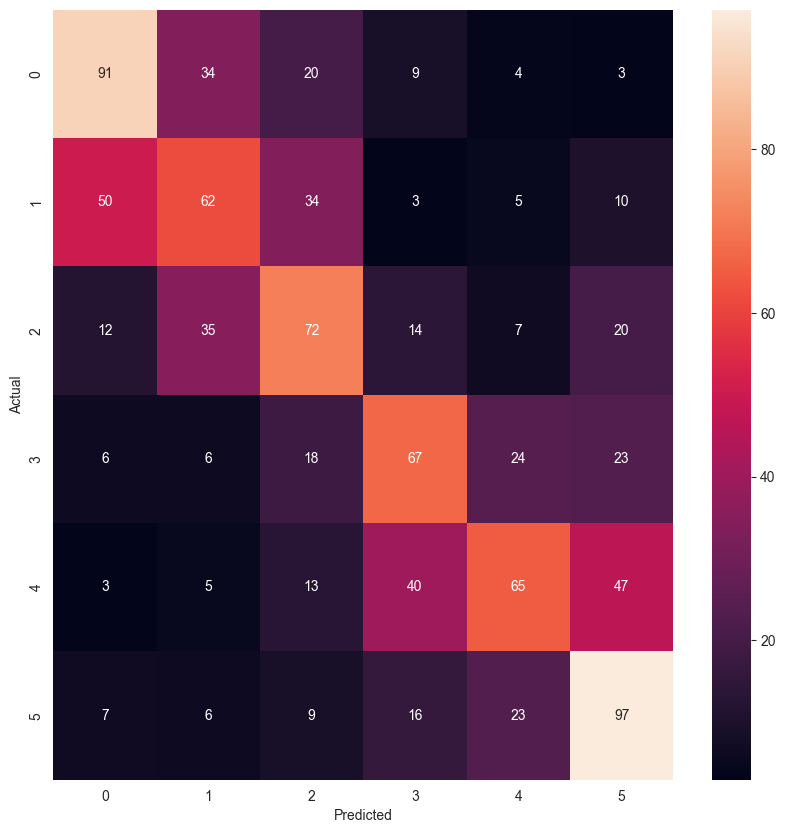

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

def accuracy_conf_mat(y_test, y_pred):
    print(round(accuracy_score(y_test, y_pred), 4))
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
accuracy_conf_mat(y_test, y_pred_LogRcv)

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [109]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# x_pred_unlabelled = df_pred[["id", "sentence"]]
# x_pred_unlabelled_tfidf = tfidf.transform(x_pred_unlabelled["sentence"])
# y_pred_unlabelled = LRcv.predict(x_pred_unlabelled_tfidf)
#
# evaluate(y_test, y_pred_unlabelled)

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tfidf, y_train)

y_pred = knn.predict(X_test_tfidf)

evaluate(y_test,y_pred)

CONFUSION MATRIX:
[[123  25  10   1   1   1]
 [101  48  10   3   1   1]
 [ 89  39  26   4   0   2]
 [ 58  29  16  33   1   7]
 [ 64  37  23  19  20  10]
 [ 49  33  15  16   5  40]]
ACCURACY SCORE:
0.3021
CLASSIFICATION REPORT:
	Precision: 0.4243
	Recall: 0.3028
	F1_Score: 0.2836


Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [111]:
from sklearn.model_selection import GridSearchCV

# Define parameters to test
grid = {'n_neighbors':np.arange(1,10),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
        }

knn2 = KNeighborsClassifier()

knn_cv = GridSearchCV(knn2, grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)

knn_cv.fit(X_train_tfidf, y_train)

y_pred = knn_cv.predict(X_test_tfidf)

print("Hyperparameters:", knn_cv.best_params_)
print("Train Score:", round(knn_cv.best_score_, 4))
print("Test Score:", round(knn_cv.score(X_test_tfidf, y_test), 4))
evaluate(y_test, y_pred)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Hyperparameters: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Train Score: 0.3513
Test Score: 0.3677
CONFUSION MATRIX:
[[116  27  14   1   1   2]
 [ 79  64  15   4   1   1]
 [ 65  38  44   8   2   3]
 [ 37  25  23  40   2  17]
 [ 37  30  23  26  36  21]
 [ 34  22  19  13  17  53]]
ACCURACY SCORE:
0.3677
CLASSIFICATION REPORT:
	Precision: 0.4227
	Recall: 0.3678
	F1_Score: 0.3575


#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [112]:

# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# create decision tree classifier object
dtc = DecisionTreeClassifier()

# train model
dtc.fit(X_train_tfidf, y_train)

# make predictions
y_pred_dtc = dtc.predict(X_test_tfidf)

# evaluate model
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[116  27  14   1   1   2]
 [ 79  64  15   4   1   1]
 [ 65  38  44   8   2   3]
 [ 37  25  23  40   2  17]
 [ 37  30  23  26  36  21]
 [ 34  22  19  13  17  53]]
ACCURACY SCORE:
0.3677
CLASSIFICATION REPORT:
	Precision: 0.4227
	Recall: 0.3678
	F1_Score: 0.3575


Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [113]:
# create decision tree classifier object
dtc2 = DecisionTreeClassifier()

# define parameters to test
grid = {'max_depth':np.arange(1,10)}

# train model
dtc_cv = GridSearchCV(dtc2, grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
dtc_cv.fit(X_train_tfidf, y_train)

# make predictions
y_pred_dtc2 = dtc_cv.predict(X_test_tfidf)

# evaluate model
print("Hyperparameters:", dtc_cv.best_params_)
print("Train Score:", round(dtc_cv.best_score_, 4))
print("Test Score:", round(dtc_cv.score(X_test_tfidf, y_test), 4))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Hyperparameters: {'max_depth': 7}
Train Score: 0.3216
Test Score: 0.3021


#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [114]:
from sklearn.ensemble import RandomForestClassifier

# create random forest classifier object
rfc = RandomForestClassifier()

# train model
rfc.fit(X_train_tfidf, y_train)

# make predictions
y_pred_rfc = rfc.predict(X_test_tfidf)

# evaluate model
evaluate(y_test, y_pred_rfc)


CONFUSION MATRIX:
[[119  23   9   7   3   0]
 [ 81  53  23   6   1   0]
 [ 35  36  54  22   5   8]
 [ 19   8  20  67  15  15]
 [ 18  10  22  50  45  28]
 [ 19  12  12  29  21  65]]
ACCURACY SCORE:
0.4198
CLASSIFICATION REPORT:
	Precision: 0.4227
	Recall: 0.3678
	F1_Score: 0.3575


#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [1]:
unlabelled_test_data = pd.read_csv("../data/unlabelled_test_data.csv")

# predict on unlabelled data with logistic regression model
unlabelled_test_data_tfidf = tfidf.transform(unlabelled_test_data["sentence"])

# import VotingClassifier
from sklearn.ensemble import VotingClassifier

# create a dictionary of our models
estimators=[ ('logrcv', LogRcv), ('logr', LogR)]

# create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

# train model
ensemble.fit(X_train_tfidf, y_train)

# make prediction on unlabelled data
y_pred_ensemble = ensemble.predict(X_train_tfidf)

# add predictions to unlabelled data
#unlabelled_test_data["difficulty"] = y_pred_ensemble

#evaluate
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred_ensemble):.4f}")


# reverse label encode with inverse_transform

#unlabelled_test_data["difficulty"] = labelencoder.inverse_transform(y_pred_ensemble)

# drop sentence column
#unlabelled_test_data.drop(columns=["sentence"], inplace=True)
# save to csv
#unlabelled_test_data.to_csv("../data/submit3.csv", index=False)


NameError: name 'pd' is not defined

#### 4.7. Show a summary of your results